# Ejercicio 3

In [98]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math
import random
import scipy.stats
from scipy import optimize

In [90]:
golden_mean = (math.sqrt(5)-1.0)/2.0       # Aesthetic ratio
fig_width = 7+3/8                       # width  in inches
fig_height = fig_width*golden_mean         # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'ps',
          'axes.titlesize': 18,
          'axes.labelsize': 19,
          'axes.linewidth': 0.5, 
          'axes.grid': False,
          'axes.labelweight': 'normal',  
          'font.family': 'serif',
          'font.size': 18.0,
          'font.weight': 'normal',
          'text.color': 'black',
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'text.usetex': True,
          'legend.fontsize': 18,
          'figure.dpi': 700,
          'figure.figsize': fig_size,
          'savefig.dpi': 700,
         }

pylab.rcParams.update(params)

Leemos el archivo de datos

In [5]:
G=nx.read_gml('as-22july06.gml')

Creamos un array con el grado de cada nodo en cada una de sus componentes

In [6]:
i=0
vector_grados=[]
cantidad_nodos = G.number_of_nodes()
while i<cantidad_nodos:
    vector_grados+=[list(G.degree)[i][1]]
    i+=1

In [25]:
#print(len(vector_grados))

Histograma en escala lineal (ambos ejes) y bineado lineal

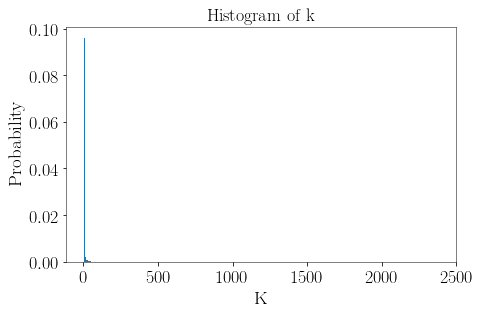

In [91]:
pylab.figure(1)
pylab.clf()

plt.hist(vector_grados,bins=np.arange(min(vector_grados),max(vector_grados),10),density=1)
pylab.xlabel('K')
pylab.ylabel('Probability')
plt.title('Histogram of k')
plt.show()

En el grafico anterior podemos observar que la escala lineal (de ambos ejes) no nos permite visualizar de forma eficiente la distribución de grado de la red.

Ahora graficamos ambos ejes el escala logarítmica, manteniendo un bineado lineal.

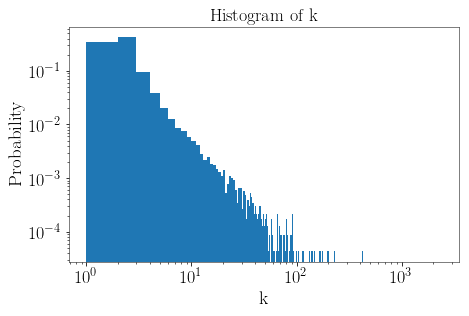

In [92]:
plt.hist(vector_grados,bins=np.arange(min(vector_grados),max(vector_grados),1),density=1)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
pylab.xlabel('k')
pylab.ylabel('Probability')
plt.title('Histogram of k')
plt.show()

Usando una escala logarítmica podemos apreciar de mejor forma la distribución de grado de la red. En este caso, se observa que, salvo para los grados más chicos (k<5) y grandes(k>100), la red posee un comportamiento "power law". Por otro lado, la "cola" de la distribución tiene un comportamiento constante. Esto ocurre debido al bineado lineal utilizado para realizar el grafico. Por lo tanto, a continuación se grafico el histograma en escala logarítimica y usando un bineado logarítmico en el eje x (k).

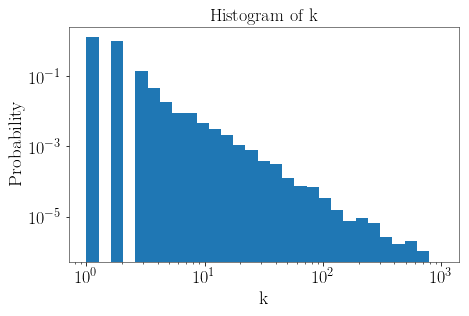

In [130]:
y, x, _ = plt.hist(vector_grados, bins=np.logspace(0,3, 30, endpoint=True, base=10.0),density=1)
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
pylab.xlabel('k')
pylab.ylabel('Probability')
plt.title('Histogram of k')
plt.show()

Usando el bineado logarítmico el comportamiento constante de la cola de la distribución (escala lineal) desaparece ya que agrupamos los "hubs" (mayores grados) en un solo bin. 

Realizamos un ajuste lineal de la distribución de grado de la red para hallar el exponente de la misma. Para llevar a cabo dicho ajuste, se elije un k mínimo de modo tal de no considerar los grados más bajos.  

In [154]:
from scipy import stats
kmin = 4
xlog = np.log(x[kmin:len(y)-1])
ylog = np.log(y[kmin:len(y)-1])

slope, intercept, r_value, p_value, std_err = stats.linregress(xlog, ylog)

Graficamos la data como el ajuste

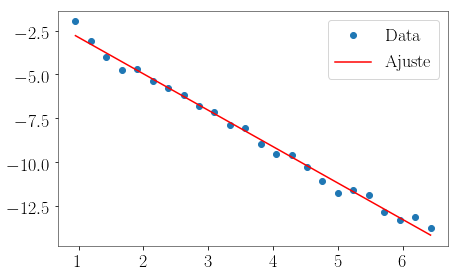

In [155]:
plt.plot(xlog, ylog, 'o', label='Data')
plt.plot(xlog, intercept + slope*xlog, 'r', label='Ajuste')
plt.legend()
plt.show()

r-squared

In [166]:
r_value**2

0.9919550553029945

Exponente de la distribución

In [170]:
slope

-2.0760476898407956